# Measures of spread 

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# version of xlrd in Colab is old and hence cannot open .xls file
# upgrading xlrd, so that pandas can open excel file with .xls extension

In [ ]:
# pip install --upgrade xlrd

## Price of a single slice of pizza
Collected from restaurants in the city of **New York** and the country of **Seneca** in New York State

In [ ]:
#nyc = [1,1,2,2,3,3,4,4,4,4,5,5,6,6,7,8,15,15,15,20,40,60,78,120]
nyc = [1,1,2,2,3,3,4,4,4,4,5,5,6,6,7,8,15,15,15,20,40]

#seneca = [1,1,2,2,3,3,4,4,4,4,5,5,6,6,7,8,3,5,2,4,6,8,12,15]
seneca = [1,1,2,2,3,3,4,4,4,4,5,5,6,6,7,8,3,5,2,4,6]

d = {
     'nyc': nyc,
     'seneca' : seneca
    }
 
us_pizza = pd.DataFrame(d)
us_pizza.head()

,nyc,seneca
0,1,1
1,1,1
2,2,2
3,2,2
4,3,3


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


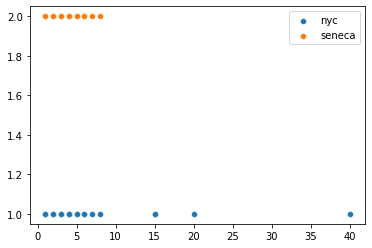

In [ ]:
# fig=plt.figure(figsize=(12,8))
# nyc_y = [1 for i in nyc]
# seneca_y = [2 for y in seneca]
# plt.scatter(nyc, nyc_y, label='nyc')
# plt.scatter(seneca, seneca_y, label='seneca')
# plt.legend(["nyc", "seneca"], loc ="upper right")
# plt.show()
sns.scatterplot(nyc, 1, label='nyc')
sns.scatterplot(seneca, 2, label='seneca')

### Finding the mean prices of Pizza in 2 different cities 

In [ ]:
us_pizza.mean().round(2)

nyc       8.10
seneca    4.05
dtype: float64

### Finding the median price of pizza 

In [ ]:
us_pizza.median()

nyc       5.0
seneca    4.0
dtype: float64

### Finding the most commonly priced  pizza (MODE)

In [ ]:
us_pizza.mode()

,nyc,seneca
0,4,4


### Which city has a bigger variance (a wide range of prices to purchase a pizza)

In [ ]:
us_pizza.std().round(2) # We are calculating the standard deviation (which is square root of variance)

**Note :Its obvious that the spread of pizza price is higher in the city of NY**

### Finding the interquartile range of the columnar data from the NYC data frame 


In [ ]:
# nyc = [1,1,2,2,3,3,4,4,4,4,5,5,6,6,7,8,15,15,15,20,40]
len(nyc)

21

In [ ]:
q1=us_pizza['nyc'].quantile(0.25) # finding the lower quartile value 
q3=us_pizza['nyc'].quantile(0.75) # finding the upper quartile value 
iqr = q3-q1  # Calculating the inter quartile range
print('Q1:', q1)
print('Q3:', q3)
print("Inter Quartile Range = ",iqr)


Q1: 3.0
Q3: 8.0
Inter Quartile Range =  5.0


In [ ]:
# Note : 1.5 times the IQR is the threshold value to find the outliers 
upf = q3+(1.5*iqr) 
lwf = q1-(1.5*iqr)
print("upper fence = ",upf)
print("lower fence = ",lwf)

upper fence =  15.5
lower fence =  -4.5


**Any data points above and below the upper and lower fence qualify for being outliers in general !**

### Box Plot - to check for the presence of outliers in the given data

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()

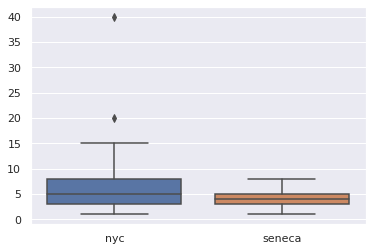

<Figure size 432x288 with 0 Axes>

In [ ]:
# Plotting the box plots for all the columns in the us_pizza data frame 
sns.boxplot(data=us_pizza)
plt.show()
plt.clf()

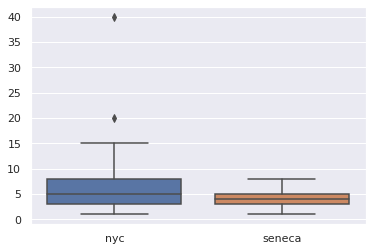

In [ ]:
plot = sns.boxplot(data=us_pizza)
fig = plot.get_figure()
fig.savefig('myboxplot.jpg')

### How to obtain the outliers data values for NYC column ? 

In [ ]:
us_pizza[(us_pizza.nyc < lwf) | (us_pizza.nyc > upf)]['nyc']

In [ ]:
# nybox = plt.boxplot(us_pizza['nyc'])
# nyout = nybox['fliers'][0]
# nyout.get_data()[1]

## Campus placement report data set 

In [ ]:
!wget https://www.dropbox.com/s/755hnawo000aeaw/Placement_Data_Full_Class.csv

In [ ]:
campus = pd.read_csv('Placement_Data_Full_Class.csv')
print(campus.shape)
campus.tail()

In [ ]:
print('mean  :', round(campus['salary'].mean(),2))
print('median:', campus['salary'].median())
print('mode  :', campus['salary'].mode()[0] )
print('max   :', campus['salary'].max())
print('min   :', campus['salary'].min())

## In class exercise : 
Find the precence of outliers (if any) on this salary column using the box plots. Print the outlier values. 

In [ ]:
fig=plt.figure(figsize=(12,8))
sal = campus['salary'].fillna(campus['salary'].mean())
salplot = plt.boxplot(sal, vert=False)
plt.show()

In [ ]:
[425000., 393000., 360000., 360000., 350000., 411000., 450000.,
        360000., 360000., 500000., 400000., 420000., 380000., 360000.,
        940000., 350000., 400000., 360000., 400000., 690000., 500000.,
        500000., 650000., 350000., 400000.]

In [ ]:
salplot

In [ ]:
salplot['fliers'][0].get_data()[0]

In [ ]:
saloutliers = salplot['fliers'][0]
saloutliers.get_data()[0]

In [ ]:
print(salplot['whiskers'][0].get_data()[0].round(2))
print(salplot['whiskers'][1].get_data()[0].round(2))

In [ ]:
salplot['caps'][1].get_data()

## US super store data 


In [ ]:
!wget https://www.dropbox.com/s/kpzd0uzqczklfly/US%20Superstore%20data.xls

--2022-12-11 04:22:14--  https://www.dropbox.com/s/kpzd0uzqczklfly/US%20Superstore%20data.xls
Resolving www.dropbox.com (www.dropbox.com)... 162.125.4.18, 2620:100:6019:18::a27d:412
Connecting to www.dropbox.com (www.dropbox.com)|162.125.4.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/raw/kpzd0uzqczklfly/US%20Superstore%20data.xls [following]
--2022-12-11 04:22:14--  https://www.dropbox.com/s/raw/kpzd0uzqczklfly/US%20Superstore%20data.xls
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc258b642d50a00461dd82b4fd5e.dl.dropboxusercontent.com/cd/0/inline/ByZEkxYBvgH7tXlzVrFOFJt6RrufLPu4OSK9Dj7iW-fk1xEcGFaLLp998-RlYlkH29kM8OC6Xm9lNIOiKMQjDuo6v75-88SeGWv04XQOx4aBit1ljBFsXn27MrmlIzXVYM0dKl74sV13qpHPrm3Zx-i6aXs6WonVhzM0IoajzjOV3Q/file# [following]
--2022-12-11 04:22:14--  https://uc258b642d50a00461dd82b4fd5e.dl.dropboxusercontent.com/cd/0/inline/ByZEkxYBvgH7tXlzVrFOFJt6RrufLPu4OSK9Dj

In [ ]:
df = pd.read_excel('US Superstore data.xls')
print(df.shape)
df.head(2)

(9994, 21)


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2,0.0,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94,3,0.0,219.5820


### Comparing the standard deviations of the profit column and the quantity column 

In [ ]:
print('Standard Deviation for Profit:',np.std(df['Profit'], axis=0))
print('Standard Deviation for Quantity:',np.std(df['Quantity'], axis=0))

### Finding the IQR for the profits column 

In [ ]:
from scipy.stats import iqr
iqr(df['Profit'],axis=0, interpolation='higher')

### Homework :
Check if there are outliers in the Profit column 

# Sampling 

In [1]:
import pandas as pd
import numpy as np


In [2]:
!wget https://www.dropbox.com/s/kpzd0uzqczklfly/US%20Superstore%20data.xls

--2022-12-17 03:13:15--  https://www.dropbox.com/s/kpzd0uzqczklfly/US%20Superstore%20data.xls
Resolving www.dropbox.com (www.dropbox.com)... 162.125.2.18, 2620:100:601f:18::a27d:912
Connecting to www.dropbox.com (www.dropbox.com)|162.125.2.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/raw/kpzd0uzqczklfly/US%20Superstore%20data.xls [following]
--2022-12-17 03:13:15--  https://www.dropbox.com/s/raw/kpzd0uzqczklfly/US%20Superstore%20data.xls
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc29a9a617c38249755d25ddd2bf.dl.dropboxusercontent.com/cd/0/inline/BywUWqz_Lyp5g3Y-2URGx0tUjwgo0kUw-8qxERJIC2iLCzVRNH4z31vN_8UjdCxWzEo0m06c7_0ncwZTBqH8ScDlZNTsF08ciLQHru-J48jzgFp_6AtnIdXfgghhSFklqfKIY7MKwzIPOtiaQfK48RZGaPPU9EmOXwIQ7zIRFbtyZA/file# [following]
--2022-12-17 03:13:15--  https://uc29a9a617c38249755d25ddd2bf.dl.dropboxusercontent.com/cd/0/inline/BywUWqz_Lyp5g3Y-2URGx0tUjwgo0kUw-8qxER

In [3]:
df = pd.read_excel('US Superstore data.xls')
print(df.shape)
df.head(2)

(9994, 21)


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2,0.0,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94,3,0.0,219.5820


In [ ]:
9994*0.3

 ### Obtaing a random sample 

In [ ]:
df.Segment.unique()

In [4]:
newdf = df.sample(frac = .30, random_state=21) # We are obtaining a sample of 30% of the original data
print(newdf.shape)
newdf.head()

(2998, 21)


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
8865,8866,CA-2015-158148,2015-12-20,2015-12-26,Standard Class,JM-15865,John Murray,Consumer,United States,Arlington,...,22204,South,OFF-AP-10003281,Office Supplies,Appliances,Acco 6 Outlet Guardian Standard Surge Suppressor,36.270,3,0.0,10.8810
4049,4050,CA-2017-136350,2017-06-24,2017-06-26,Second Class,GA-14515,George Ashbrook,Consumer,United States,New York City,...,10011,East,FUR-FU-10003601,Furniture,Furnishings,"Deflect-o RollaMat Studded, Beveled Mat for Me...",276.690,3,0.0,49.8042
11,12,CA-2014-115812,2014-06-09,2014-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,TEC-PH-10002033,Technology,Phones,Konftel 250 Conference phone - Charcoal black,911.424,4,0.2,68.3568
7505,7506,US-2017-106579,2017-06-08,2017-06-13,Standard Class,BW-11200,Ben Wallace,Consumer,United States,Skokie,...,60076,Central,OFF-BI-10000309,Office Supplies,Binders,"GBC Twin Loop Wire Binding Elements, 9/16"" Spi...",12.176,4,0.8,-18.8728
2102,2103,CA-2014-123295,2014-07-18,2014-07-18,Same Day,AH-10120,Adrian Hane,Home Office,United States,Tucson,...,85705,West,FUR-CH-10002372,Furniture,Chairs,Office Star - Ergonomically Designed Knee Chair,259.136,4,0.2,-25.9136


In [ ]:
newdf.head()

In [5]:
df.Segment.unique()

array(['Consumer', 'Corporate', 'Home Office'], dtype=object)

## Practice exercise 

1) Obtain a stratified random sampling on the above data using the Segment column, i.e each segment can be considered as a strata  

Hint : Create multiple data frames by filtering based on each segment. Obtain a simple random sample from each of the dataframes
and create a new data frame by appending the results obtained. 

In [8]:
seg1df = df[df.Segment=='Corporate']
seg2df = df[df.Segment=='Consumer']
seg3df = df[df.Segment=='Home Office']

seg1sample = seg1df.sample(frac=.01)
seg2sample = seg2df.sample(frac=.01)
seg3sample = seg3df.sample(frac=.01)

print(seg1sample.shape)
print(seg2sample.shape)
print(seg3sample.shape)

# stratifiedSample = concatenation of the above 3 seg samples

(30, 21)
(52, 21)
(18, 21)


In [9]:
stdf = pd.concat([seg1sample, seg2sample, seg3sample], axis=0)
stdf.shape

(100, 21)

In [10]:
stdf.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
764,765,CA-2014-162775,2014-01-13,2014-01-15,Second Class,CS-12250,Chris Selesnick,Corporate,United States,Bossier City,...,71111,South,OFF-EN-10001532,Office Supplies,Envelopes,Brown Kraft Recycled Envelopes,50.940,3,0.0,25.4700
3278,3279,CA-2014-102988,2014-04-05,2014-04-09,Second Class,GM-14695,Greg Maxwell,Corporate,United States,Alexandria,...,22304,South,OFF-PA-10003349,Office Supplies,Paper,Xerox 1957,12.960,2,0.0,6.3504
4925,4926,CA-2017-126438,2017-09-10,2017-09-13,First Class,AR-10345,Alex Russell,Corporate,United States,Lawrence,...,1841,East,OFF-AR-10003338,Office Supplies,Art,"Eberhard Faber 3 1/2"" Golf Pencils",14.880,2,0.0,3.7200
6688,6689,CA-2017-140494,2017-03-10,2017-03-15,Second Class,CM-11815,Candace McMahon,Corporate,United States,San Francisco,...,94109,West,TEC-AC-10004568,Technology,Accessories,Maxell LTO Ultrium - 800 GB,111.960,4,0.0,21.2724
4862,4863,CA-2016-125164,2016-11-10,2016-11-14,Standard Class,SH-19975,Sally Hughsby,Corporate,United States,New York City,...,10011,East,OFF-BI-10001191,Office Supplies,Binders,Canvas Sectional Post Binders,20.368,1,0.2,7.3834
